In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from module.hogangnono.Hogangnono import Hogangnono
hgnn = Hogangnono()


In [ ]:

# Load the data
data = hgnn.merge_apts_info_interpolated_filled_real_trade
data = data[['gu_name', 'dong_name', 'name'] + hgnn.date_list]
data
# # Reshape data for easier handling
data_long = data.melt(id_vars=['dong_name', 'gu_name', 'name'], var_name='date', value_name='price')
data_long
# Convert date from string to datetime
data_long['date'] = pd.to_datetime(data_long['date'])
data_long

# Calculate returns
data_long = data_long.sort_values(by=['name', 'date'])
data_long['return'] = data_long.groupby('name')['price'].apply(lambda x: x / x.iloc[0] - 1).reset_index(level=0, drop=True)

# Get unique gu names
gus = data_long['gu_name'].unique()

# Calculate the return for each dong from the first to the last date
data_long['total_return'] = data_long.groupby('name')['price'].transform(lambda x: x.iloc[-1] / x.iloc[0] - 1)

# Create a DataFrame with the total returns for each dong
returns = data_long[['name', 'gu_name', 'total_return']].drop_duplicates()

# Remove outliers
Q1 = returns['total_return'].quantile(0.25)
Q3 = returns['total_return'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
returns_filtered = returns[(returns['total_return'] >= lower_bound) & (returns['total_return'] <= upper_bound)]

# Determine common x-axis range after removing outliers
x_min = returns_filtered['total_return'].min()
x_max = returns_filtered['total_return'].max()

# Create common bins
common_bins = np.linspace(x_min, x_max, 21)  # 20 bins

# Create subplots
fig, axes = plt.subplots(nrows=len(gus)//3 + 1, ncols=3, figsize=(20, 25), sharex=True, sharey=True)
axes = axes.flatten()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Plot each gu
for i, gu in enumerate(gus):
    ax = axes[i]
    gu_data = returns[returns['gu_name'] == gu]
    sns.histplot(gu_data['total_return'], bins=common_bins, kde=True, ax=ax)
    mean_value = gu_data['total_return'].mean()
    ax.axvline(mean_value, color='red', linestyle='--')
    ax.set_xlim(x_min, x_max)
    ax.set_title(gu)
    ax.set_xlabel('Total Return')
    ax.set_ylabel('Frequency')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = hgnn.merge_apts_info_interpolated_filled_real_trade
data = data[['gu_name', 'dong_name', 'name', 'areaType'] + hgnn.date_list]

# Reshape data for easier handling
data_long = data.melt(id_vars=['dong_name', 'gu_name', 'name', 'areaType'], var_name='date', value_name='price')

# Convert date from string to datetime
data_long['date'] = pd.to_datetime(data_long['date'])

# Calculate returns
data_long = data_long.sort_values(by=['name', 'date'])
data_long['return'] = data_long.groupby(['name', 'areaType'])['price'].apply(lambda x: x / x.iloc[0] - 1).reset_index(level=[0, 1], drop=True)

# Calculate the return for each apartment from the first to the last date
data_long['total_return'] = data_long.groupby(['name', 'areaType'])['price'].transform(lambda x: x.iloc[-1] / x.iloc[0] - 1)

# Create a DataFrame with the total returns for each apartment
returns = data_long[['name', 'gu_name', 'total_return']].drop_duplicates()

# Remove outliers
Q1 = returns['total_return'].quantile(0.15)
Q3 = returns['total_return'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
returns_filtered = returns[(returns['total_return'] >= lower_bound) & (returns['total_return'] <= upper_bound)]

# Plot the data
plt.figure(figsize=(20, 10))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Create a violin plot with scatter for each gu
sns.violinplot(x='gu_name', y='total_return', data=returns_filtered, inner=None, scale='width', palette='pastel')


# Add a mean point for each gu
mean_values = returns_filtered.groupby('gu_name')['total_return'].mean().reset_index()
sns.scatterplot(x='gu_name', y='total_return', data=mean_values, color='red', s=100, marker='D', edgecolor='black', zorder=5, label='Mean')

plt.xlabel('Gu Name')
plt.ylabel('Total Return')
plt.title('Total Return by Gu')
plt.legend(title='Statistics', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = hgnn.merge_apts_info_interpolated_filled_real_trade
data = data[['gu_name', 'dong_name', 'name', 'areaType'] + hgnn.date_list]

# Reshape data for easier handling
data_long = data.melt(id_vars=['dong_name', 'gu_name', 'name', 'areaType'], var_name='date', value_name='price')

# Convert date from string to datetime
data_long['date'] = pd.to_datetime(data_long['date'])

# Calculate returns
data_long = data_long.sort_values(by=['name', 'date'])
data_long['return'] = data_long.groupby(['name', 'areaType'])['price'].apply(lambda x: x / x.iloc[0] - 1).reset_index(level=[0, 1], drop=True)

# Calculate the return for each apartment from the first to the last date
data_long['total_return'] = data_long.groupby(['name', 'areaType'])['price'].transform(lambda x: x.iloc[-1] / x.iloc[0] - 1)
data_long

,dong_name,gu_name,name,areaType,date,price,return,total_return
3213,둔촌동,강동구,2차현대,107,2005-12-01,32000.0,0.000000,2.000000
3214,둔촌동,강동구,2차현대,92,2005-12-01,25000.0,0.000000,2.040000
3215,둔촌동,강동구,2차현대,107,2005-12-01,32000.0,0.000000,2.000000
37042,둔촌동,강동구,2차현대,107,2006-01-01,32000.0,0.000000,2.000000
37043,둔촌동,강동구,2차현대,92,2006-01-01,25000.0,0.000000,2.040000
...,...,...,...,...,...,...,...,...
7553081,구의동,광진구,힐하우스(도시형),22,2024-07-01,14500.0,0.208333,0.208333
7553082,구의동,광진구,힐하우스(도시형),22,2024-07-01,14500.0,0.208333,0.208333
7553083,구의동,광진구,힐하우스(도시형),26,2024-07-01,5300.0,0.000000,0.000000
7553084,구의동,광진구,힐하우스(도시형),35,2024-07-01,18000.0,0.000000,0.000000


In [7]:
data_long[data_long.gu_name == '강남구'][data_long.name=='힐타워'][data_long.areaType == '144']

,dong_name,gu_name,name,areaType,date,price,return,total_return
476,논현동,강남구,힐타워,144,2005-12-01,73000.0,0.000000,0.712329
34305,논현동,강남구,힐타워,144,2006-01-01,73000.0,0.000000,0.712329
68134,논현동,강남구,힐타워,144,2006-02-01,73000.0,0.000000,0.712329
101963,논현동,강남구,힐타워,144,2006-03-01,73000.0,0.000000,0.712329
135792,논현동,강남구,힐타워,144,2006-04-01,73000.0,0.000000,0.712329
...,...,...,...,...,...,...,...,...
7409027,논현동,강남구,힐타워,144,2024-03-01,125000.0,0.712329,0.712329
7442856,논현동,강남구,힐타워,144,2024-04-01,125000.0,0.712329,0.712329
7476685,논현동,강남구,힐타워,144,2024-05-01,125000.0,0.712329,0.712329
7510514,논현동,강남구,힐타워,144,2024-06-01,125000.0,0.712329,0.712329


In [13]:
data_long[data_long.gu_name == '강남구'][data_long.name == "현대인텔렉스"][data_long.areaType == 192][data_long.total_return < 0]

,dong_name,gu_name,name,areaType,date,price,return,total_return
470,논현동,강남구,현대인텔렉스,192,2005-12-01,95000.0,0.000000,-0.063158
34299,논현동,강남구,현대인텔렉스,192,2006-01-01,95000.0,0.000000,-0.063158
68128,논현동,강남구,현대인텔렉스,192,2006-02-01,95000.0,0.000000,-0.063158
101957,논현동,강남구,현대인텔렉스,192,2006-03-01,95000.0,0.000000,-0.063158
135786,논현동,강남구,현대인텔렉스,192,2006-04-01,95000.0,0.000000,-0.063158
...,...,...,...,...,...,...,...,...
7409021,논현동,강남구,현대인텔렉스,192,2024-03-01,89000.0,-0.063158,-0.063158
7442850,논현동,강남구,현대인텔렉스,192,2024-04-01,89000.0,-0.063158,-0.063158
7476679,논현동,강남구,현대인텔렉스,192,2024-05-01,89000.0,-0.063158,-0.063158
7510508,논현동,강남구,현대인텔렉스,192,2024-06-01,89000.0,-0.063158,-0.063158


In [12]:
hgnn.apts[hgnn.apts.total_household > 700]

,gu_id,gu_name,dong_id,dong_name,id,name,lat,lng,floor_max,floor_min,heat_source,approval_date,asile_type,total_household
3,11680,강남구,1168010300,개포동,b4Ye5,개포래미안포레스트,37.478548,127.054066,35.0,7.0,열병합,20200929.0,계단식,2296.0
6,11680,강남구,1168010300,개포동,ds61e,개포자이프레지던스,37.485226,127.071601,35.0,7.0,도시가스,20230228.0,계단식,3375.0
7,11680,강남구,1168010300,개포동,1Otf7,개포주공5단지,37.487803,127.068015,14.0,13.0,열병합,19831026.0,복도식,940.0
8,11680,강남구,1168010300,개포동,1Oubb,개포주공6단지,37.488638,127.070465,15.0,13.0,열병합,19831026.0,복도식,1060.0
9,11680,강남구,1168010300,개포동,1Ovac,개포주공7단지,37.489472,127.072418,15.0,15.0,열병합,19831026.0,복도식,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9084,11260,중랑구,1126010600,신내동,m83d,신내데시앙포레,37.615451,127.110021,24.0,6.0,도시가스,20131201.0,계단식,1896.0
9086,11260,중랑구,1126010600,신내동,m74d,신내우디안1단지,37.617703,127.106425,24.0,11.0,도시가스,20140618.0,계단식,1402.0
9095,11260,중랑구,1126010600,신내동,me6e,중앙하이츠,37.603490,127.098089,15.0,7.0,도시가스,19960328.0,계단식,704.0
9104,11260,중랑구,1126010300,중화동,em846,리버센SKVIEW롯데캐슬,37.602397,127.075850,35.0,13.0,도시가스,20251118.0,NaN,1055.0


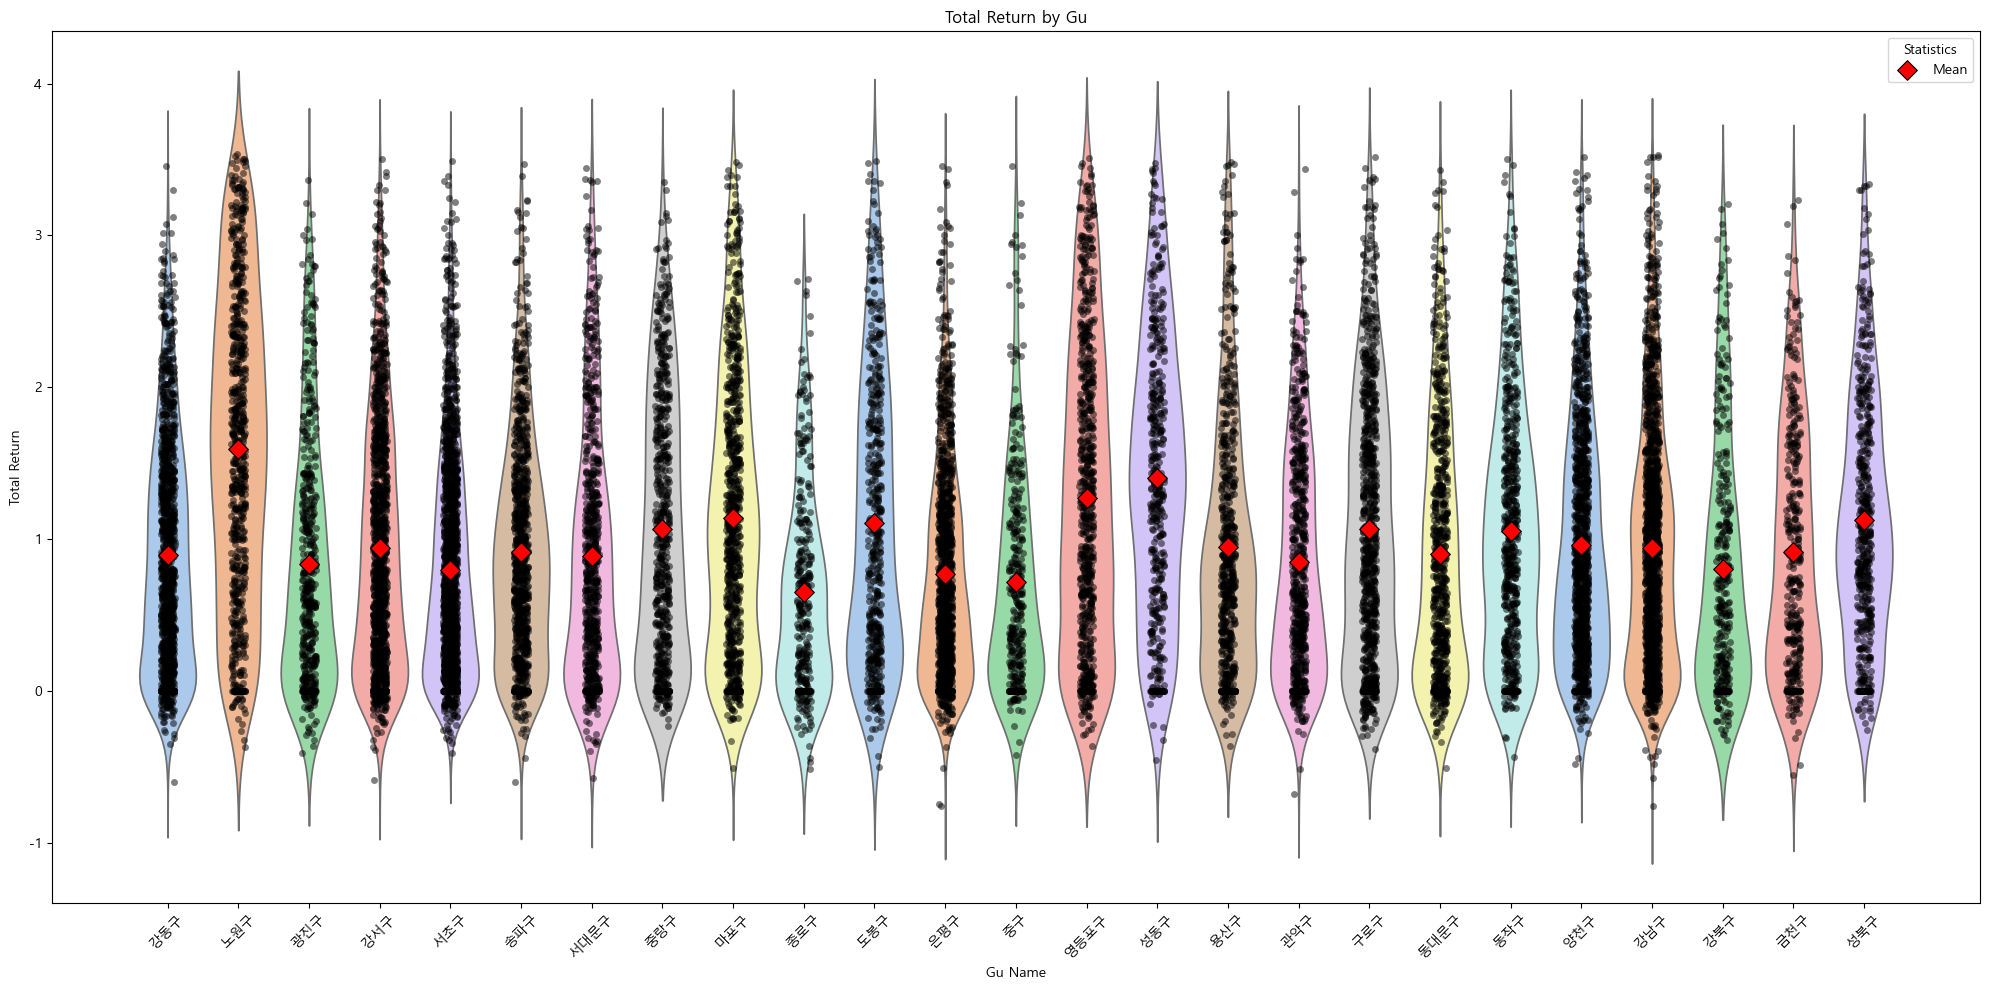

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = hgnn.merge_apts_info_interpolated_filled_real_trade
data = data[['gu_name', 'dong_name', 'name', 'areaType'] + hgnn.date_list]

# Reshape data for easier handling
data_long = data.melt(id_vars=['dong_name', 'gu_name', 'name', 'areaType'], var_name='date', value_name='price')

# Convert date from string to datetime
data_long['date'] = pd.to_datetime(data_long['date'])

# Calculate returns
data_long = data_long.sort_values(by=['name', 'date'])
data_long['return'] = data_long.groupby(['name', 'areaType'])['price'].apply(lambda x: x / x.iloc[0] - 1).reset_index(level=[0, 1], drop=True)

# Calculate the return for each apartment from the first to the last date
data_long['total_return'] = data_long.groupby(['name', 'areaType'])['price'].transform(lambda x: x.iloc[-1] / x.iloc[0] - 1)

# # Create a DataFrame with the total returns for each apartment
# returns = data_long[['name', 'gu_name', 'total_return']].drop_duplicates()

# # Remove outliers
# Q1 = returns['total_return'].quantile(0.25)
# Q3 = returns['total_return'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# returns_filtered = returns[(returns['total_return'] >= lower_bound) & (returns['total_return'] <= upper_bound)]

# # Plot the data
# plt.figure(figsize=(20, 10))
# plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] = False

# # Create a violin plot with scatter for each gu
# sns.violinplot(x='gu_name', y='total_return', data=returns_filtered, inner=None, scale='width', palette='pastel')

# # Add a mean point for each gu
# mean_values = returns_filtered.groupby('gu_name')['total_return'].mean().reset_index()
# sns.scatterplot(x='gu_name', y='total_return', data=mean_values, color='red', s=100, marker='D', edgecolor='black', zorder=5, label='Mean')

# plt.xlabel('Gu Name')
# plt.ylabel('Total Return')
# plt.title('Total Return by Gu')
# plt.legend(title='Statistics', loc='upper right')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


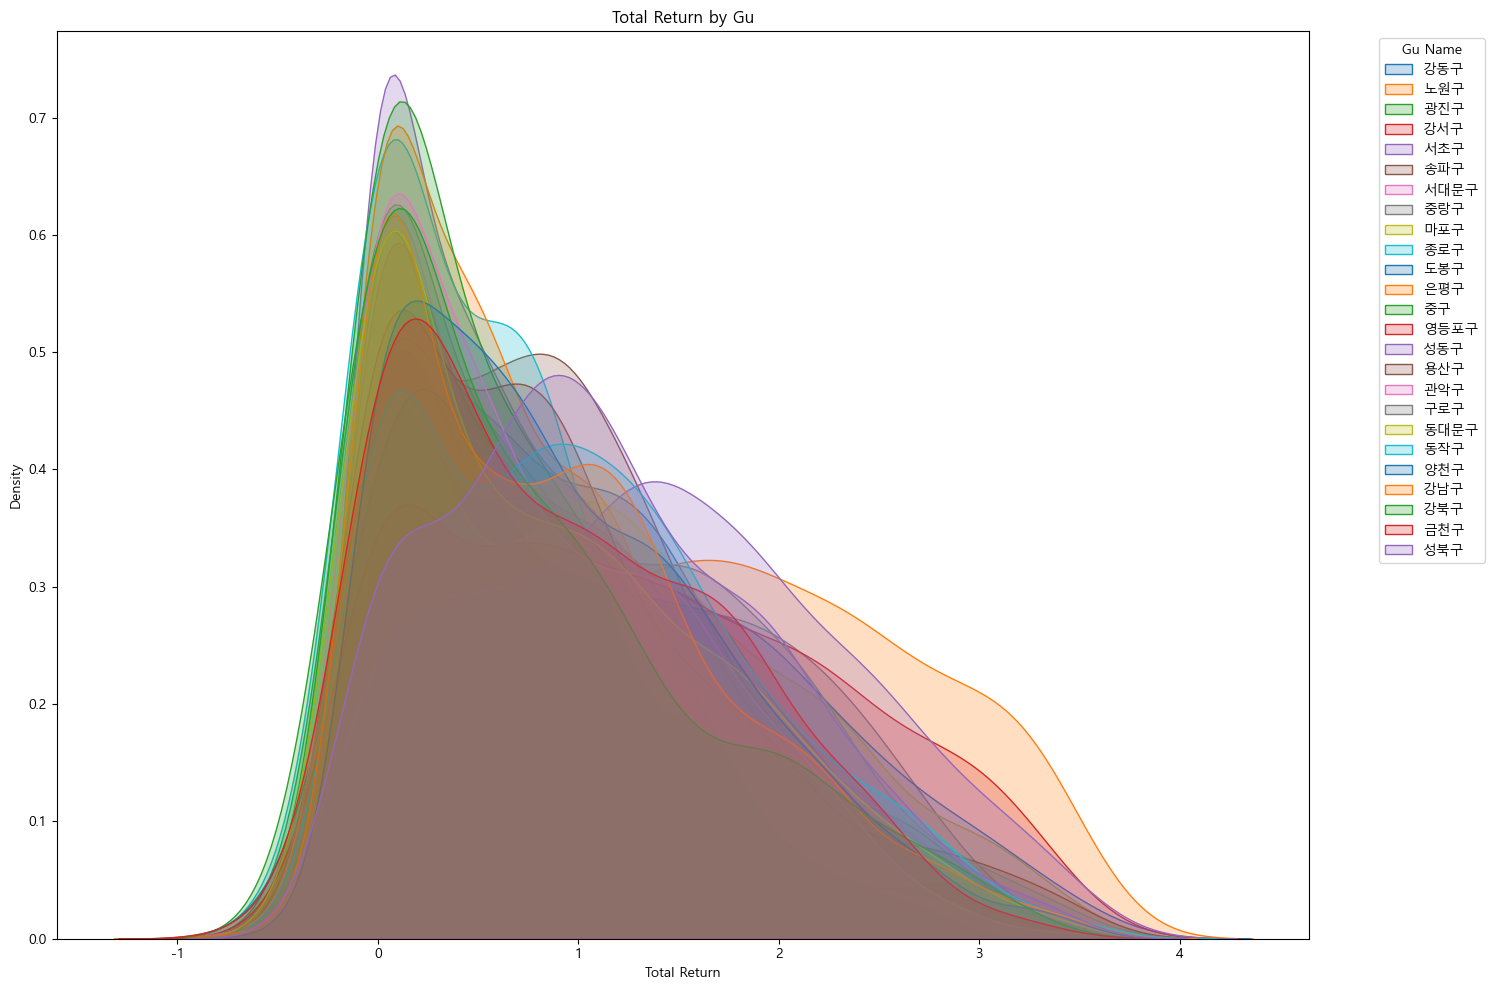

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = hgnn.merge_apts_info_interpolated_filled_real_trade
data = data[['gu_name', 'dong_name', 'name', 'areaType'] + hgnn.date_list]

# Reshape data for easier handling
data_long = data.melt(id_vars=['dong_name', 'gu_name', 'name', 'areaType'], var_name='date', value_name='price')

# Convert date from string to datetime
data_long['date'] = pd.to_datetime(data_long['date'])

# Calculate returns
data_long = data_long.sort_values(by=['name', 'date'])
data_long['return'] = data_long.groupby(['name', 'areaType'])['price'].apply(lambda x: x / x.iloc[0] - 1).reset_index(level=[0, 1], drop=True)

# Calculate the return for each apartment from the first to the last date
data_long['total_return'] = data_long.groupby(['name', 'areaType'])['price'].transform(lambda x: x.iloc[-1] / x.iloc[0] - 1)

# Create a DataFrame with the total returns for each apartment
returns = data_long[['name', 'gu_name', 'areaType', 'total_return']].drop_duplicates()

# Remove outliers
Q1 = returns['total_return'].quantile(0.25)
Q3 = returns['total_return'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
returns_filtered = returns[(returns['total_return'] >= lower_bound) & (returns['total_return'] <= upper_bound)]

# Plot the data
plt.figure(figsize=(15, 10))
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Create a KDE plot for each gu
for gu in returns_filtered['gu_name'].unique():
    sns.kdeplot(data=returns_filtered[returns_filtered['gu_name'] == gu], x='total_return', fill=True, label=gu)


plt.xlabel('Total Return')
plt.ylabel('Density')
plt.title('Total Return by Gu')
plt.legend(title='Gu Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
